In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import *
from BlackScholes import *

import random
import pandas as pd
import math
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.regularizers import l1,l2
from keras.callbacks import EarlyStopping
from keras.constraints import non_neg
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, cross_val_score, train_test_split
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
import statsmodels.api as sm
import statsmodels.stats.diagnostic as tds
from statsmodels.api import add_constant
from scipy import stats
from scipy import optimize


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import tensorflow as tf

In [4]:
r = 0.0002  # risk-free rate
S= 100      # Underlying spot
KC = 130    # Call strike
KP = 70     # Put strike
sigma = 0.4 # implied volatility
T = 2.0     # Time to maturity

In [5]:
# define the call and put prices using the BS model
call = lambda x: bsformula(1, lb+(ub-lb)*x, KC, r, T, sigma, 0)[0]
put = lambda x: bsformula(-1, lb+(ub-lb)*x, KP, r, T, sigma, 0)[0]
call_delta = lambda x: bsformula(1, lb+(ub-lb)*x, KC, r, T, sigma, 0)[1]
put_delta = lambda x: bsformula(-1, lb+(ub-lb)*x, KP, r, T, sigma, 0)[1]

# NN Call pricer

In [6]:
lb = 0.001           # lower bound on domain
ub = 300             # upper bound on domain
training_number = 100  # Number of training samples
testing_number = 100 # Number of testing samples

train_x_1 = np.array(np.linspace(0,1, training_number), dtype='float32').reshape(training_number, 1)
train_y_1 = []
for S in train_x_1:
    train_y_1.append(call(S))
    
test_x_1 = np.array(np.linspace(0,2, testing_number), dtype='float32').reshape(testing_number, 1)
test_y_1 = []
for S in test_x_1:
    test_y_1.append(call(S))

In [7]:
n_hidden = 100 # 
initializer=tf.initializers.random_uniform(0, (ub-KC)/n_hidden)
#initializer = tf.initializers.RandomUniform(-1, 1)
#config = initializer.get_config()
#initializer = RandomUniform.from_config(config)


In [8]:

# see https://keras.io/constraints/
def NN1_model(n_hidden_units=n_hidden, l1_reg=0.0):    
    model = Sequential()
    model.add(Dense(n_hidden_units, input_dim=1, kernel_initializer='normal', activation='softplus'))
    #model.add(Dense(n_hidden_neurons, input_dim=1, kernel_initializer='normal',kernel_regularizer=l1(l1_reg), activation='relu'))
    model.add(Dense(1, input_dim=n_hidden_units, kernel_initializer=initializer, kernel_constraint = non_neg(), bias_constraint=non_neg()))  #use_bias=False))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])
    return model

print("\nUsing Neural Networks, hidden neurons=1, l1_reg=0, epochs=40, batch_size=22\n")
lm = KerasRegressor(build_fn=NN1_model, epochs=2000, batch_size=1, verbose=1)  # This line defines a NN predictive model


Using Neural Networks, hidden neurons=1, l1_reg=0, epochs=40, batch_size=22



In [148]:
lm.fit(np.array(train_x_1), np.array(train_y_1))

Epoch 1/2000
100/100 [==============================] - 1s 7ms/step - loss: 3062.4384 - mean_absolute_error: 48.8803 - mean_squared_error: 3062.4384
Epoch 2/2000
100/100 [==============================] - 0s 1ms/step - loss: 3011.2031 - mean_absolute_error: 48.4159 - mean_squared_error: 3011.2031
Epoch 3/2000
100/100 [==============================] - 0s 1ms/step - loss: 2963.3701 - mean_absolute_error: 48.0722 - mean_squared_error: 2963.3701
Epoch 4/2000
100/100 [==============================] - 0s 1ms/step - loss: 2915.2186 - mean_absolute_error: 47.7332 - mean_squared_error: 2915.2186
Epoch 5/2000
100/100 [==============================] - 0s 1ms/step - loss: 2869.2701 - mean_absolute_error: 47.4303 - mean_squared_error: 2869.2701
Epoch 6/2000
100/100 [==============================] - 0s 1ms/step - loss: 2825.5825 - mean_absolute_error: 47.0284 - mean_squared_error: 2825.5825
Epoch 7/2000
100/100 [==============================] - 0s 1ms/step - loss: 2778.6276 - mean_absolute_erro

100/100 [==============================] - 0s 984us/step - loss: 566.0189 - mean_absolute_error: 21.6903 - mean_squared_error: 566.0189
Epoch 110/2000
100/100 [==============================] - 0s 986us/step - loss: 556.0837 - mean_absolute_error: 21.5090 - mean_squared_error: 556.0837
Epoch 111/2000
100/100 [==============================] - 0s 998us/step - loss: 547.0475 - mean_absolute_error: 21.3056 - mean_squared_error: 547.0475
Epoch 112/2000
100/100 [==============================] - 0s 986us/step - loss: 537.1697 - mean_absolute_error: 21.1470 - mean_squared_error: 537.1697
Epoch 113/2000
100/100 [==============================] - 0s 1ms/step - loss: 528.3702 - mean_absolute_error: 20.9651 - mean_squared_error: 528.3702
Epoch 114/2000
100/100 [==============================] - 0s 1ms/step - loss: 518.9749 - mean_absolute_error: 20.7608 - mean_squared_error: 518.9749
Epoch 115/2000
100/100 [==============================] - 0s 1ms/step - loss: 510.9370 - mean_absolute_error: 20.

100/100 [==============================] - 0s 1ms/step - loss: 186.8705 - mean_absolute_error: 12.2983 - mean_squared_error: 186.8705
Epoch 165/2000
100/100 [==============================] - 0s 1ms/step - loss: 181.9989 - mean_absolute_error: 12.0005 - mean_squared_error: 181.9989
Epoch 166/2000
100/100 [==============================] - 0s 1000us/step - loss: 179.1595 - mean_absolute_error: 11.9812 - mean_squared_error: 179.1595
Epoch 167/2000
100/100 [==============================] - 0s 965us/step - loss: 174.0851 - mean_absolute_error: 11.6930 - mean_squared_error: 174.0851
Epoch 168/2000
100/100 [==============================] - 0s 1ms/step - loss: 169.5510 - mean_absolute_error: 11.5799 - mean_squared_error: 169.5510
Epoch 169/2000
100/100 [==============================] - 0s 1ms/step - loss: 165.5045 - mean_absolute_error: 11.4548 - mean_squared_error: 165.5045
Epoch 170/2000
100/100 [==============================] - 0s 1ms/step - loss: 161.8649 - mean_absolute_error: 11.324

100/100 [==============================] - 0s 987us/step - loss: 34.0872 - mean_absolute_error: 5.1903 - mean_squared_error: 34.0872
Epoch 275/2000
100/100 [==============================] - 0s 993us/step - loss: 34.0784 - mean_absolute_error: 5.1792 - mean_squared_error: 34.0784
Epoch 276/2000
100/100 [==============================] - 0s 985us/step - loss: 34.0876 - mean_absolute_error: 5.1458 - mean_squared_error: 34.0876
Epoch 277/2000
100/100 [==============================] - 0s 993us/step - loss: 34.0576 - mean_absolute_error: 5.2113 - mean_squared_error: 34.0576
Epoch 278/2000
100/100 [==============================] - 0s 1ms/step - loss: 33.8872 - mean_absolute_error: 5.1696 - mean_squared_error: 33.8872
Epoch 279/2000
100/100 [==============================] - 0s 1ms/step - loss: 33.7067 - mean_absolute_error: 5.1663 - mean_squared_error: 33.7067
Epoch 280/2000
100/100 [==============================] - 0s 1ms/step - loss: 33.5874 - mean_absolute_error: 5.1518 - mean_squared_

100/100 [==============================] - 0s 1ms/step - loss: 25.4963 - mean_absolute_error: 4.4550 - mean_squared_error: 25.4963
Epoch 385/2000
100/100 [==============================] - 0s 988us/step - loss: 24.5754 - mean_absolute_error: 4.3570 - mean_squared_error: 24.5754
Epoch 386/2000
100/100 [==============================] - 0s 963us/step - loss: 24.8283 - mean_absolute_error: 4.4484 - mean_squared_error: 24.8283
Epoch 387/2000
100/100 [==============================] - 0s 992us/step - loss: 24.4583 - mean_absolute_error: 4.3799 - mean_squared_error: 24.4583
Epoch 388/2000
100/100 [==============================] - 0s 1ms/step - loss: 24.2865 - mean_absolute_error: 4.3330 - mean_squared_error: 24.2865
Epoch 389/2000
100/100 [==============================] - 0s 1ms/step - loss: 24.2736 - mean_absolute_error: 4.3756 - mean_squared_error: 24.2736
Epoch 390/2000
100/100 [==============================] - 0s 1ms/step - loss: 24.2568 - mean_absolute_error: 4.4029 - mean_squared_er

100/100 [==============================] - 0s 973us/step - loss: 16.9232 - mean_absolute_error: 3.5794 - mean_squared_error: 16.9232
Epoch 495/2000
100/100 [==============================] - 0s 995us/step - loss: 17.0256 - mean_absolute_error: 3.5957 - mean_squared_error: 17.0256
Epoch 496/2000
100/100 [==============================] - 0s 966us/step - loss: 16.8206 - mean_absolute_error: 3.5539 - mean_squared_error: 16.8206
Epoch 497/2000
100/100 [==============================] - 0s 1ms/step - loss: 16.9390 - mean_absolute_error: 3.5640 - mean_squared_error: 16.9390
Epoch 498/2000
100/100 [==============================] - 0s 1ms/step - loss: 16.7223 - mean_absolute_error: 3.5330 - mean_squared_error: 16.7223
Epoch 499/2000
100/100 [==============================] - 0s 986us/step - loss: 16.6854 - mean_absolute_error: 3.5454 - mean_squared_error: 16.6854
Epoch 500/2000
100/100 [==============================] - 0s 987us/step - loss: 16.8164 - mean_absolute_error: 3.5827 - mean_square

100/100 [==============================] - 0s 1ms/step - loss: 11.0064 - mean_absolute_error: 2.8332 - mean_squared_error: 11.0064
Epoch 605/2000
100/100 [==============================] - 0s 970us/step - loss: 10.9638 - mean_absolute_error: 2.8208 - mean_squared_error: 10.9638
Epoch 606/2000
100/100 [==============================] - 0s 953us/step - loss: 10.7169 - mean_absolute_error: 2.7824 - mean_squared_error: 10.7169
Epoch 607/2000
100/100 [==============================] - 0s 996us/step - loss: 11.0164 - mean_absolute_error: 2.8533 - mean_squared_error: 11.0164
Epoch 608/2000
100/100 [==============================] - 0s 945us/step - loss: 10.7143 - mean_absolute_error: 2.8072 - mean_squared_error: 10.7143
Epoch 609/2000
100/100 [==============================] - 0s 971us/step - loss: 10.6860 - mean_absolute_error: 2.7565 - mean_squared_error: 10.6860
Epoch 610/2000
100/100 [==============================] - 0s 963us/step - loss: 10.7565 - mean_absolute_error: 2.7934 - mean_squa

Epoch 660/2000
100/100 [==============================] - 0s 957us/step - loss: 8.6532 - mean_absolute_error: 2.4713 - mean_squared_error: 8.6532
Epoch 661/2000
100/100 [==============================] - 0s 960us/step - loss: 8.5090 - mean_absolute_error: 2.4421 - mean_squared_error: 8.5090
Epoch 662/2000
100/100 [==============================] - 0s 956us/step - loss: 8.5130 - mean_absolute_error: 2.4533 - mean_squared_error: 8.5130
Epoch 663/2000
100/100 [==============================] - 0s 1ms/step - loss: 8.5572 - mean_absolute_error: 2.4712 - mean_squared_error: 8.5572
Epoch 664/2000
100/100 [==============================] - 0s 976us/step - loss: 8.5355 - mean_absolute_error: 2.4557 - mean_squared_error: 8.5355
Epoch 665/2000
100/100 [==============================] - 0s 985us/step - loss: 8.5029 - mean_absolute_error: 2.4463 - mean_squared_error: 8.5029
Epoch 666/2000
100/100 [==============================] - 0s 982us/step - loss: 8.4958 - mean_absolute_error: 2.4600 - mean_sq

100/100 [==============================] - 0s 958us/step - loss: 5.1027 - mean_absolute_error: 1.8268 - mean_squared_error: 5.1027
Epoch 773/2000
100/100 [==============================] - 0s 954us/step - loss: 5.0917 - mean_absolute_error: 1.8395 - mean_squared_error: 5.0917
Epoch 774/2000
100/100 [==============================] - 0s 988us/step - loss: 5.0735 - mean_absolute_error: 1.8322 - mean_squared_error: 5.0735
Epoch 775/2000
100/100 [==============================] - 0s 980us/step - loss: 4.9966 - mean_absolute_error: 1.7852 - mean_squared_error: 4.9966
Epoch 776/2000
100/100 [==============================] - 0s 994us/step - loss: 5.0260 - mean_absolute_error: 1.8151 - mean_squared_error: 5.0260
Epoch 777/2000
100/100 [==============================] - 0s 975us/step - loss: 5.0315 - mean_absolute_error: 1.8039 - mean_squared_error: 5.0315
Epoch 778/2000
100/100 [==============================] - 0s 978us/step - loss: 4.9723 - mean_absolute_error: 1.8188 - mean_squared_error: 

100/100 [==============================] - 0s 939us/step - loss: 2.8345 - mean_absolute_error: 1.2836 - mean_squared_error: 2.8345
Epoch 885/2000
100/100 [==============================] - 0s 938us/step - loss: 2.8472 - mean_absolute_error: 1.3077 - mean_squared_error: 2.8472
Epoch 886/2000
100/100 [==============================] - 0s 977us/step - loss: 2.8186 - mean_absolute_error: 1.2941 - mean_squared_error: 2.8186
Epoch 887/2000
100/100 [==============================] - 0s 1ms/step - loss: 2.8259 - mean_absolute_error: 1.2915 - mean_squared_error: 2.8259
Epoch 888/2000
100/100 [==============================] - 0s 946us/step - loss: 2.7825 - mean_absolute_error: 1.2852 - mean_squared_error: 2.7825
Epoch 889/2000
100/100 [==============================] - 0s 1ms/step - loss: 2.7911 - mean_absolute_error: 1.2919 - mean_squared_error: 2.7911
Epoch 890/2000
100/100 [==============================] - 0s 998us/step - loss: 2.7437 - mean_absolute_error: 1.2611 - mean_squared_error: 2.74

100/100 [==============================] - 0s 959us/step - loss: 1.6539 - mean_absolute_error: 0.9877 - mean_squared_error: 1.6539
Epoch 997/2000
100/100 [==============================] - 0s 958us/step - loss: 1.6470 - mean_absolute_error: 0.9762 - mean_squared_error: 1.6470
Epoch 998/2000
100/100 [==============================] - 0s 946us/step - loss: 1.6255 - mean_absolute_error: 0.9697 - mean_squared_error: 1.6255
Epoch 999/2000
100/100 [==============================] - 0s 1ms/step - loss: 1.6227 - mean_absolute_error: 0.9808 - mean_squared_error: 1.6227
Epoch 1000/2000
100/100 [==============================] - 0s 936us/step - loss: 1.6298 - mean_absolute_error: 0.9766 - mean_squared_error: 1.6298
Epoch 1001/2000
100/100 [==============================] - 0s 987us/step - loss: 1.6220 - mean_absolute_error: 0.9694 - mean_squared_error: 1.6220
Epoch 1002/2000
100/100 [==============================] - 0s 1ms/step - loss: 1.6156 - mean_absolute_error: 0.9825 - mean_squared_error: 1

100/100 [==============================] - 0s 946us/step - loss: 1.4100 - mean_absolute_error: 0.9333 - mean_squared_error: 1.4100
Epoch 1053/2000
100/100 [==============================] - 0s 977us/step - loss: 1.4431 - mean_absolute_error: 0.9551 - mean_squared_error: 1.4431
Epoch 1054/2000
100/100 [==============================] - 0s 987us/step - loss: 1.4198 - mean_absolute_error: 0.9536 - mean_squared_error: 1.4198
Epoch 1055/2000
100/100 [==============================] - 0s 940us/step - loss: 1.3881 - mean_absolute_error: 0.9300 - mean_squared_error: 1.3881
Epoch 1056/2000
100/100 [==============================] - 0s 941us/step - loss: 1.3649 - mean_absolute_error: 0.9057 - mean_squared_error: 1.3649
Epoch 1057/2000
100/100 [==============================] - 0s 987us/step - loss: 1.3571 - mean_absolute_error: 0.8981 - mean_squared_error: 1.3571
Epoch 1058/2000
100/100 [==============================] - 0s 959us/step - loss: 1.3909 - mean_absolute_error: 0.9268 - mean_squared_e

100/100 [==============================] - 0s 906us/step - loss: 1.3204 - mean_absolute_error: 0.9299 - mean_squared_error: 1.3204
Epoch 1109/2000
100/100 [==============================] - 0s 916us/step - loss: 1.2657 - mean_absolute_error: 0.9191 - mean_squared_error: 1.2657
Epoch 1110/2000
100/100 [==============================] - 0s 915us/step - loss: 1.2349 - mean_absolute_error: 0.8816 - mean_squared_error: 1.2349
Epoch 1111/2000
100/100 [==============================] - 0s 938us/step - loss: 1.2526 - mean_absolute_error: 0.8836 - mean_squared_error: 1.2526
Epoch 1112/2000
100/100 [==============================] - 0s 916us/step - loss: 1.2380 - mean_absolute_error: 0.8717 - mean_squared_error: 1.2380
Epoch 1113/2000
100/100 [==============================] - 0s 926us/step - loss: 1.2457 - mean_absolute_error: 0.8859 - mean_squared_error: 1.2457
Epoch 1114/2000
100/100 [==============================] - 0s 921us/step - loss: 1.2564 - mean_absolute_error: 0.8875 - mean_squared_e

100/100 [==============================] - 0s 1ms/step - loss: 1.0362 - mean_absolute_error: 0.8105 - mean_squared_error: 1.0362
Epoch 1221/2000
100/100 [==============================] - 0s 2ms/step - loss: 1.0493 - mean_absolute_error: 0.8253 - mean_squared_error: 1.0493
Epoch 1222/2000
100/100 [==============================] - 0s 1ms/step - loss: 1.0010 - mean_absolute_error: 0.7843 - mean_squared_error: 1.0010
Epoch 1223/2000
100/100 [==============================] - 0s 2ms/step - loss: 1.0162 - mean_absolute_error: 0.7882 - mean_squared_error: 1.0162
Epoch 1224/2000
100/100 [==============================] - 0s 1ms/step - loss: 1.0140 - mean_absolute_error: 0.7826 - mean_squared_error: 1.0140
Epoch 1225/2000
100/100 [==============================] - 0s 917us/step - loss: 1.0160 - mean_absolute_error: 0.7984 - mean_squared_error: 1.0160
Epoch 1226/2000
100/100 [==============================] - 0s 940us/step - loss: 1.0139 - mean_absolute_error: 0.7963 - mean_squared_error: 1.01

100/100 [==============================] - 0s 919us/step - loss: 0.8092 - mean_absolute_error: 0.6846 - mean_squared_error: 0.8092
Epoch 1332/2000
100/100 [==============================] - 0s 944us/step - loss: 0.8140 - mean_absolute_error: 0.6743 - mean_squared_error: 0.8140
Epoch 1333/2000
100/100 [==============================] - 0s 927us/step - loss: 0.7974 - mean_absolute_error: 0.6620 - mean_squared_error: 0.7974
Epoch 1334/2000
100/100 [==============================] - 0s 919us/step - loss: 0.8036 - mean_absolute_error: 0.6743 - mean_squared_error: 0.8036
Epoch 1335/2000
100/100 [==============================] - 0s 1ms/step - loss: 0.8120 - mean_absolute_error: 0.6772 - mean_squared_error: 0.8120
Epoch 1336/2000
100/100 [==============================] - 0s 1ms/step - loss: 0.8023 - mean_absolute_error: 0.6833 - mean_squared_error: 0.8023
Epoch 1337/2000
100/100 [==============================] - 0s 1ms/step - loss: 0.7902 - mean_absolute_error: 0.6667 - mean_squared_error: 

100/100 [==============================] - 0s 906us/step - loss: 0.6103 - mean_absolute_error: 0.5654 - mean_squared_error: 0.6103
Epoch 1443/2000
100/100 [==============================] - 0s 891us/step - loss: 0.6236 - mean_absolute_error: 0.5954 - mean_squared_error: 0.6236
Epoch 1444/2000
100/100 [==============================] - 0s 925us/step - loss: 0.6172 - mean_absolute_error: 0.5834 - mean_squared_error: 0.6172
Epoch 1445/2000
100/100 [==============================] - 0s 967us/step - loss: 0.6237 - mean_absolute_error: 0.5900 - mean_squared_error: 0.6237
Epoch 1446/2000
100/100 [==============================] - 0s 1ms/step - loss: 0.6088 - mean_absolute_error: 0.5660 - mean_squared_error: 0.6088
Epoch 1447/2000
100/100 [==============================] - 0s 1ms/step - loss: 0.6422 - mean_absolute_error: 0.6163 - mean_squared_error: 0.6422
Epoch 1448/2000
100/100 [==============================] - 0s 918us/step - loss: 0.6119 - mean_absolute_error: 0.5782 - mean_squared_error

100/100 [==============================] - 0s 1ms/step - loss: 0.4960 - mean_absolute_error: 0.5213 - mean_squared_error: 0.4960
Epoch 1554/2000
100/100 [==============================] - 0s 1ms/step - loss: 0.5101 - mean_absolute_error: 0.5450 - mean_squared_error: 0.5101
Epoch 1555/2000
100/100 [==============================] - 0s 935us/step - loss: 0.4956 - mean_absolute_error: 0.5262 - mean_squared_error: 0.4956
Epoch 1556/2000
100/100 [==============================] - 0s 894us/step - loss: 0.5017 - mean_absolute_error: 0.5368 - mean_squared_error: 0.5017
Epoch 1557/2000
100/100 [==============================] - 0s 877us/step - loss: 0.4945 - mean_absolute_error: 0.5252 - mean_squared_error: 0.4945
Epoch 1558/2000
100/100 [==============================] - 0s 935us/step - loss: 0.4840 - mean_absolute_error: 0.5085 - mean_squared_error: 0.4840
Epoch 1559/2000
100/100 [==============================] - 0s 940us/step - loss: 0.4845 - mean_absolute_error: 0.5119 - mean_squared_error

100/100 [==============================] - 0s 921us/step - loss: 0.4237 - mean_absolute_error: 0.4932 - mean_squared_error: 0.4237
Epoch 1666/2000
100/100 [==============================] - 0s 954us/step - loss: 0.4382 - mean_absolute_error: 0.5127 - mean_squared_error: 0.4382
Epoch 1667/2000
100/100 [==============================] - 0s 939us/step - loss: 0.4154 - mean_absolute_error: 0.4875 - mean_squared_error: 0.4154
Epoch 1668/2000
100/100 [==============================] - 0s 963us/step - loss: 0.4221 - mean_absolute_error: 0.4988 - mean_squared_error: 0.4221
Epoch 1669/2000
100/100 [==============================] - 0s 990us/step - loss: 0.4265 - mean_absolute_error: 0.5059 - mean_squared_error: 0.4265
Epoch 1670/2000
100/100 [==============================] - 0s 971us/step - loss: 0.4122 - mean_absolute_error: 0.4810 - mean_squared_error: 0.4122
Epoch 1671/2000
100/100 [==============================] - 0s 917us/step - loss: 0.4089 - mean_absolute_error: 0.4761 - mean_squared_e

100/100 [==============================] - 0s 880us/step - loss: 0.3722 - mean_absolute_error: 0.4653 - mean_squared_error: 0.3722
Epoch 1776/2000
100/100 [==============================] - 0s 882us/step - loss: 0.3707 - mean_absolute_error: 0.4676 - mean_squared_error: 0.3707
Epoch 1777/2000
100/100 [==============================] - 0s 926us/step - loss: 0.3653 - mean_absolute_error: 0.4588 - mean_squared_error: 0.3653
Epoch 1778/2000
100/100 [==============================] - 0s 922us/step - loss: 0.3759 - mean_absolute_error: 0.4778 - mean_squared_error: 0.3759
Epoch 1779/2000
100/100 [==============================] - 0s 919us/step - loss: 0.3745 - mean_absolute_error: 0.4699 - mean_squared_error: 0.3745
Epoch 1780/2000
100/100 [==============================] - 0s 910us/step - loss: 0.4126 - mean_absolute_error: 0.5117 - mean_squared_error: 0.4126
Epoch 1781/2000
100/100 [==============================] - 0s 914us/step - loss: 0.4130 - mean_absolute_error: 0.5120 - mean_squared_e

Epoch 1831/2000
100/100 [==============================] - 0s 944us/step - loss: 0.3544 - mean_absolute_error: 0.4572 - mean_squared_error: 0.3544
Epoch 1832/2000
100/100 [==============================] - 0s 932us/step - loss: 0.3641 - mean_absolute_error: 0.4677 - mean_squared_error: 0.3641
Epoch 1833/2000
100/100 [==============================] - 0s 1ms/step - loss: 0.3496 - mean_absolute_error: 0.4514 - mean_squared_error: 0.3496
Epoch 1834/2000
100/100 [==============================] - 0s 1ms/step - loss: 0.3540 - mean_absolute_error: 0.4471 - mean_squared_error: 0.3540
Epoch 1835/2000
100/100 [==============================] - 0s 922us/step - loss: 0.3716 - mean_absolute_error: 0.4807 - mean_squared_error: 0.3716
Epoch 1836/2000
100/100 [==============================] - 0s 934us/step - loss: 0.3523 - mean_absolute_error: 0.4636 - mean_squared_error: 0.3523
Epoch 1837/2000
100/100 [==============================] - 0s 944us/step - loss: 0.3452 - mean_absolute_error: 0.4540 - me

100/100 [==============================] - 0s 930us/step - loss: 0.3237 - mean_absolute_error: 0.4389 - mean_squared_error: 0.3237
Epoch 1943/2000
100/100 [==============================] - 0s 936us/step - loss: 0.3123 - mean_absolute_error: 0.4241 - mean_squared_error: 0.3123
Epoch 1944/2000
100/100 [==============================] - 0s 943us/step - loss: 0.3232 - mean_absolute_error: 0.4416 - mean_squared_error: 0.3232
Epoch 1945/2000
100/100 [==============================] - 0s 916us/step - loss: 0.3172 - mean_absolute_error: 0.4343 - mean_squared_error: 0.3172
Epoch 1946/2000
100/100 [==============================] - 0s 924us/step - loss: 0.3244 - mean_absolute_error: 0.4518 - mean_squared_error: 0.3244
Epoch 1947/2000
100/100 [==============================] - 0s 919us/step - loss: 0.3197 - mean_absolute_error: 0.4361 - mean_squared_error: 0.3197
Epoch 1948/2000
100/100 [==============================] - 0s 929us/step - loss: 0.3148 - mean_absolute_error: 0.4285 - mean_squared_e

In [23]:
W1=lm.model.get_weights()[0]
b1=lm.model.get_weights()[1]
W2=lm.model.get_weights()[2]
b2=lm.model.get_weights()[3]

AttributeError: 'KerasRegressor' object has no attribute 'model'

In [175]:
y_pred_1= lm.predict(np.array(test_x_1))

100/100 [==============================] - 0s 524us/step


Text(0,0.5,'V')

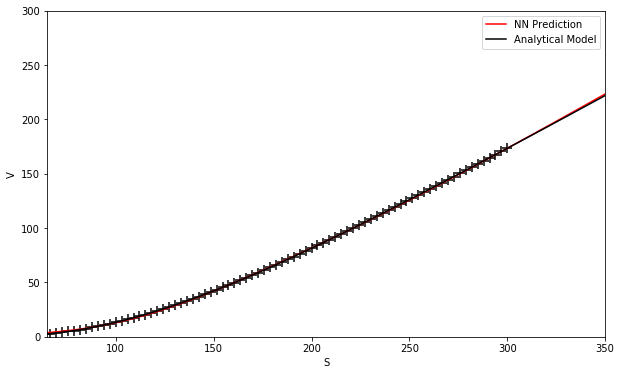

In [176]:
# predictionn plot with var band 
plt.figure(figsize = (10, 6), facecolor='white', edgecolor='black')
plt.plot(lb+(ub-lb)*test_x_1.flatten(), y_pred_1, color = 'red', label = 'NN Prediction')
plt.plot(lb+(ub-lb)*test_x_1.flatten(), test_y_1, color = 'black', label = 'Analytical Model')
plt.scatter(lb+(ub-lb)*train_x_1, train_y_1, color = 'black', marker = '+', s = 100) 
#plt.fill_between(lb+(ub-lb)*test_x_1.flatten(), (y_pred_1.T-2*sigma_1).flatten(), (y_pred_1.T+2*sigma_1).flatten(), color = 'grey', alpha=0.3)
plt.legend(loc = 'best', prop={'size':10})
#plt.xlim([KC/2.0,2.0*KC])
plt.xlim([KC/2.0,350]) #lb+(ub-lb)*max(test_x_1)])

plt.ylim([0,300]) # lb+(ub-lb)*max(test_x_1)-KC])
plt.xlabel('S')
plt.ylabel('V')

# greeks

In [203]:
#Z1 = np.tanh(np.dot(np.transpose(W1),np.transpose(np.array(test_x_1)) + b1)
#Z1= np.tanh(np.dot(np.transpose(W1),np.transpose(X)) + np.outer(np.transpose(b1), np.ones(1000)))

In [212]:
delta = np.array([0]*100, dtype=float32)
y_hat = np.array([0]*100, dtype=float32)
for i in range(100):

  Z  = (np.dot(np.transpose(W1),np.array(test_x_1[i])) + b1)
  D = np.diag(1/(1+np.exp(-Z)))
  delta[i] = np.dot(np.transpose(W2),np.dot(D,W1[0]))
  y_hat[i]=np.dot(np.transpose(W2),np.log(1+np.exp(Z))) + b2

Text(0,0.5,'$\\Delta$')

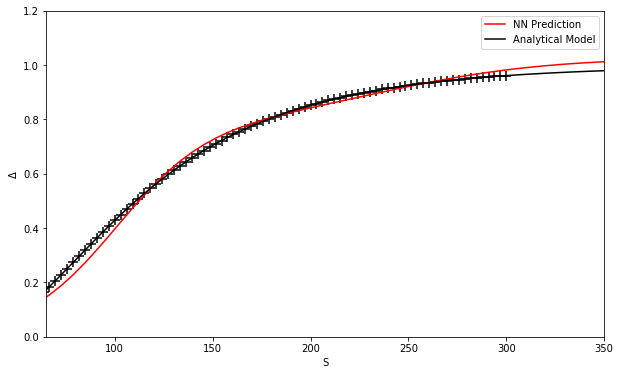

In [218]:
# predictionn plot with var band 
plt.figure(figsize = (10, 6), facecolor='white', edgecolor='black')
plt.plot(lb+(ub-lb)*test_x_1.flatten(), delta/(ub-lb), color = 'red', label = 'NN Prediction')
plt.plot(lb+(ub-lb)*test_x_1.flatten(), call_delta(np.array(test_x_1)), color = 'black', label = 'Analytical Model')
plt.scatter(lb+(ub-lb)*train_x_1, call_delta(np.array(train_x_1)), color = 'black', marker = '+', s = 100) 
#plt.fill_between(lb+(ub-lb)*test_x_1.flatten(), (y_pred_1.T-2*sigma_1).flatten(), (y_pred_1.T+2*sigma_1).flatten(), color = 'grey', alpha=0.3)
plt.legend(loc = 'best', prop={'size':10})
#plt.xlim([KC/2.0,2.0*KC])
plt.xlim([KC/2.0,350]) #lb+(ub-lb)*max(test_x_1)])

plt.ylim([0,1.2]) # lb+(ub-lb)*max(test_x_1)-KC])
plt.xlabel('S')
plt.ylabel('$\Delta$')


In [32]:
import keras.backend as K



def custom_loss(yTrue,yPred):
    #w1 = model.get_layers[0].get_weights()[0] # weights of the first layer
    #b1 = model.get_layers[0].get_weights()[1] # bias of the first layer
    #w2 = model.get_layers[1].get_weights()[0] # weights of the second layer
    
    return K.sum(K.square(yTrue - yPred))

In [ ]:
lambda_1 =0.1
def new_reg(weight_matrix):
    return 0.01 * K.sum(K.abs(weight_matrix))

In [33]:
# see https://keras.io/constraints/
def NN1_model(n_hidden_units=n_hidden, l1_reg=0.0):    
    model = Sequential()
    model.add(Dense(n_hidden_units, input_dim=1, kernel_initializer='normal', activation='softplus'))
    #model.add(Dense(n_hidden_neurons, input_dim=1, kernel_initializer='normal',kernel_regularizer=l1(l1_reg), activation='relu'))
    model.add(Dense(1, input_dim=n_hidden_units, kernel_initializer=initializer, kernel_constraint = non_neg(), bias_constraint=non_neg()))  #use_bias=False))
    #model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])
    model.compile(loss=custom_loss, optimizer='adam', metrics=['mae', 'mse'])
    return model

print("\nUsing Neural Networks, hidden neurons=1, l1_reg=0, epochs=40, batch_size=22\n")
lm = KerasRegressor(build_fn=NN1_model, epochs=2000, batch_size=1, verbose=1)  # This line defines a NN predictive model


Using Neural Networks, hidden neurons=1, l1_reg=0, epochs=40, batch_size=22



In [34]:
lm.fit(np.array(train_x_1), np.array(train_y_1))

Epoch 1/2000
100/100 [==============================] - 0s 4ms/step - loss: 3076.3817 - mean_absolute_error: 48.8858 - mean_squared_error: 3076.3817
Epoch 2/2000
100/100 [==============================] - 0s 859us/step - loss: 3020.6245 - mean_absolute_error: 48.5469 - mean_squared_error: 3020.6245
Epoch 3/2000
100/100 [==============================] - 0s 804us/step - loss: 2972.2753 - mean_absolute_error: 48.2150 - mean_squared_error: 2972.2753
Epoch 4/2000
100/100 [==============================] - 0s 960us/step - loss: 2929.2968 - mean_absolute_error: 47.8783 - mean_squared_error: 2929.2968
Epoch 5/2000
100/100 [==============================] - 0s 840us/step - loss: 2882.5651 - mean_absolute_error: 47.4566 - mean_squared_error: 2882.5651
Epoch 6/2000
100/100 [==============================] - 0s 909us/step - loss: 2836.9526 - mean_absolute_error: 47.0971 - mean_squared_error: 2836.9526
Epoch 7/2000
100/100 [==============================] - 0s 862us/step - loss: 2796.8088 - mean_a

KeyboardInterrupt: 

# NN Put pricer

In [116]:
train_x_2 = np.array(np.linspace(0,1, training_number), dtype='float32').reshape(training_number, 1)
train_y_2 = []
for S in train_x_2:
    train_y_2.append(put(S))
    
testing_number = 100
test_x_2 = np.array(np.linspace(0,1, testing_number), dtype='float32').reshape(testing_number, 1)
test_y_2 = []
for S in test_x_2:
    test_y_2.append(put(S))

TypeError: put() missing 2 required positional arguments: 'ind' and 'v'

In [ ]:
lm.fit(np.array(train_x_2),np.array(train_y_2))

In [23]:
y_pred_2 = lm.predict(np.array(test_x_2))

(0, 40)

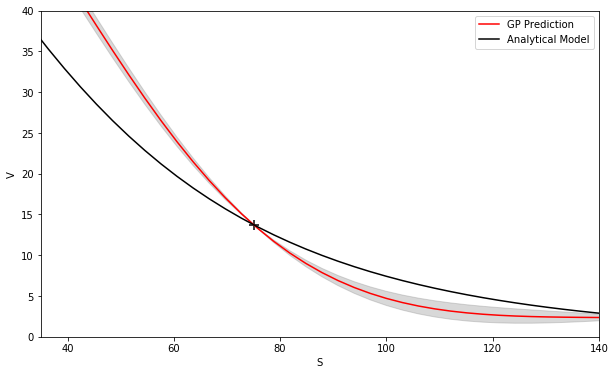

In [26]:
# prediction plot with var band 
plt.figure(figsize = (10, 6), facecolor='white', edgecolor='black')
plt.plot(lb+(ub-lb)*test_x_2.flatten(), y_pred_2, color = 'red', label = 'NN Prediction')
plt.plot(lb+(ub-lb)*test_x_2.flatten(), test_y_2, color = 'black', label = 'Analytical Model')
plt.scatter(lb+(ub-lb)*train_x_2.flatten(), train_y_2, color = 'black', marker = '+', s = 100) 
plt.legend(loc = 'best', prop={'size':10})
plt.xlabel('S')
plt.ylabel('V')
plt.xlim([KP/2.0,2.0*KP])
plt.ylim([0,40])

# portfolio value

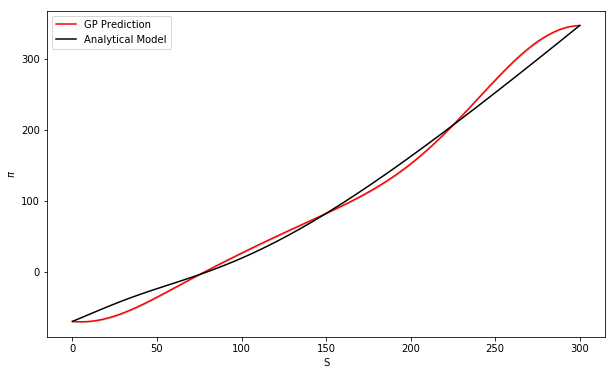

In [27]:
# portfolio prediction plot with var band 
y_pred = 2.0*y_pred_1 - y_pred_2 # long 2 calls and short a put
test_y = 2.0*np.array(test_y_1) - np.array(test_y_2)
sigma = np.sqrt(sigma_1*sigma_1 + sigma_2*sigma_2)
plt.figure(figsize = (10, 6), facecolor='white', edgecolor='black')
plt.plot(lb+(ub-lb)*test_x_2.flatten(), y_pred, color = 'red', label = 'NN Prediction')
plt.plot(lb+(ub-lb)*test_x_2.flatten(), test_y.flatten(), color = 'black', label = 'Analytical Model')
#plt.fill_between(lb+(ub-lb)*test_x_2.flatten(), (y_pred.T-2*sigma).flatten(), (y_pred.T+2*sigma).flatten(), color = 'grey', alpha=0.3)
plt.legend(loc = 'best', prop={'size':10})
plt.xlabel('S')
plt.ylabel('$\pi$')